<a href="https://colab.research.google.com/github/yunyeong-choi/2022fin/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C%20%EB%B0%B0%EC%9A%B0%EB%8A%94%20%EC%8B%A4%EC%A0%84%20%EA%B8%88%EC%9C%B5%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D(%ED%80%80%ED%8A%B8)/5%EA%B0%95_%EC%82%B0%EC%97%85%EC%84%B9%ED%84%B0%EB%B3%84_%EC%A3%BC%EA%B0%80%EB%B6%84%EC%84%9D_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20220930

# 데이터 분석을 통해 나만의 주식 투자 전략 만들어보기.
- 재무제표, 주가 등 주식 데이터 파일(엑셀 csv)을 읽어서 코딩으로 그래프를 그려보자  
- 주식 데이터 분석1. 전체 주식시장에서 산업 별로 차지하는 비중 계산해보기  
- 주식 데이터 분석2. 최근 수익률이 좋았던 종목은?  수익률이 좋았던 산업은?  
- 주식 데이터 분석3. 데이터를 가공해서, 종목을 선별해보자 (적자 종목 제거, 하락추세 종목 제거, 종목별 PER 산출, 종목별 거래대금 분석 등) 
- 시뮬레이션1. 분석을 통해 선별한 종목에 투자하면, 수익률이 어떨까?

## 라이브러리 임포트

In [1]:
# COLAB 환경을 위한 나눔고딕 한글폰트 설치  --> 진행 후,  런타임 > 런타임 다시 시작을 해 주세요. 다시 시작 후에는 이 부분 실행 X
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (31.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
# matplotlib 임포트,  주피터 출력설정,  한글 글꼴 지정
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'NanumBarunGothic'  # (Colab 용) 한글 출력을 위한 글꼴 설정

In [2]:
import numpy as np
import pandas as pd

# 이름을 붙여 변수를 저장하는 사전, dict

In [3]:
my_dict = {}
my_dict

{}

In [4]:
my_dict = {
    '이름': '홍길동',
    '강의': '원티드',
    '키': 185,
    'pie': 3.141592,
    '리스트': [1,2,3,4,5]
}
my_dict

{'이름': '홍길동', '강의': '원티드', '키': 185, 'pie': 3.141592, '리스트': [1, 2, 3, 4, 5]}

In [5]:
my_dict['이름']

'홍길동'

In [6]:
my_dict['pie']

3.141592

In [7]:
my_dict['리스트']

[1, 2, 3, 4, 5]

In [8]:
my_dict['리스트'][3]

4

In [9]:
my_dict.keys()

dict_keys(['이름', '강의', '키', 'pie', '리스트'])

In [12]:
my_dict.values()

dict_values(['임꺽정', '원티드', 185, 3.141592, [1, 2, 3, 4, 5]])

In [10]:
my_dict

{'이름': '홍길동', '강의': '원티드', '키': 185, 'pie': 3.141592, '리스트': [1, 2, 3, 4, 5]}

In [11]:
# 기존의 key에 대한 value 수정하기
my_dict['이름'] = '임꺽정'

In [13]:
# 새로운 key와 value 추가하기
my_dict['직업'] = '의적'

In [14]:
my_dict

{'이름': '임꺽정',
 '강의': '원티드',
 '키': 185,
 'pie': 3.141592,
 '리스트': [1, 2, 3, 4, 5],
 '직업': '의적'}

In [15]:
my_dict.keys()

dict_keys(['이름', '강의', '키', 'pie', '리스트', '직업'])

In [16]:
my_dict.values()

dict_values(['임꺽정', '원티드', 185, 3.141592, [1, 2, 3, 4, 5], '의적'])

##### <연습문제 3-1>
my_dict의 pie 값을 44로 변경해보세요

In [17]:
my_dict['pie']=44
my_dict

{'이름': '임꺽정',
 '강의': '원티드',
 '키': 185,
 'pie': 44,
 '리스트': [1, 2, 3, 4, 5],
 '직업': '의적'}

## 데이터 불러오기

In [18]:
!wget "https://drive.google.com/uc?export=download&id=1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1" -O "stock_data.zip"

--2022-09-30 02:39:58--  https://drive.google.com/uc?export=download&id=1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1
Resolving drive.google.com (drive.google.com)... 142.250.31.139, 142.250.31.138, 142.250.31.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.31.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ol8t4nsh17pvg0esra2elijgop3qk1ls/1664505600000/03135380322884973343/*/1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1?e=download&uuid=463b8201-17ee-4987-a77d-556e3da3996e [following]
--2022-09-30 02:40:01--  https://doc-00-4g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ol8t4nsh17pvg0esra2elijgop3qk1ls/1664505600000/03135380322884973343/*/1VrrOVibE-oxdxY30SnfCDJ6Ghv38jXm1?e=download&uuid=463b8201-17ee-4987-a77d-556e3da3996e
Resolving doc-00-4g-docs.googleusercontent.com (doc-00-4g-docs.googleusercontent.com)... 172.253.122.132, 2607

In [19]:
!unzip stock_data.zip

Archive:  stock_data.zip
  inflating: stock.adj_close.csv     
  inflating: stock.eq.csv            
  inflating: stock.liab.csv          
  inflating: stock.mc.csv            
  inflating: stock.ni.csv            
  inflating: stock.op.csv            
  inflating: stock.sales.csv         
  inflating: stockinfo.itemname.csv  
  inflating: stockinfo.sector.csv    


## 3.2. 주식 데이터 및 기업 분석 배우기  
### [ 데이터 설명 ]
- symbol 종목코드
**일별 데이터:**
- 데이터 파일: __stock.*{테이블이름}*.csv__
- 데이터 기간: 2018-06-01 ~ 2020-10-14, 약 2년 4개월, 비영업일 제외
- 종목 수: 2,278 개
- 단위 (테이블이름, 설명)
    - 원 단위: adj_close 주가
    - 백만원 단위 : mc 시가총액, sales 매출액, op 영업이익, ni 순이익, liab 부채, eq 자본, asset_cur 유동자산 
        
  
**색인 데이터:**
- __stockinfo.itemname.csv__ : 종목 코드와 종목 명
- __stockinfo.sector.csv__ : 종목 코드와 해당하는 섹터

#### 일자별 주식 데이터 불러오기 (dict 및 for문 사용)

In [20]:
d = {}

# For문 이용하여 읽기- 주가, 시가총액, 매출액, 영업익, 순이익, 부채, 자본
# adj_close : 주가
# mc : 시가총액
# sales : 매출액
# op : 영업익
# ni : 순이익
# liab : 부채
# eq : 자본
for data_name in ['adj_close', 'mc', 'sales', 'op', 'ni', 'liab', 'eq']:
    print(f"read csv {data_name} ...")
    d[data_name] = pd.read_csv(f"stock.{data_name}.csv", index_col=0, encoding='cp949', parse_dates=True)
    print(f"done!  {d[data_name].shape}")

read csv adj_close ...
done!  (2278, 582)
read csv mc ...
done!  (2278, 582)
read csv sales ...
done!  (2278, 582)
read csv op ...
done!  (2278, 582)
read csv ni ...
done!  (2278, 582)
read csv liab ...
done!  (2278, 582)
read csv eq ...
done!  (2278, 582)


In [21]:
# 데이터 확인하기
d

{'adj_close':          2018-06-01  2018-06-04  2018-06-05  2018-06-07  2018-06-08  \
 Symbol                                                                
 A000020     11550.0     11750.0     11700.0     11650.0     11500.0   
 A000030     15500.0     15950.0     16050.0     16500.0     16600.0   
 A000040      2992.0      3021.0      3025.0      3069.0      3045.0   
 A000050     13200.0     13550.0     13600.0     13800.0     13800.0   
 A000060     20050.0     20050.0     20150.0     20050.0     20400.0   
 ...             ...         ...         ...         ...         ...   
 A950160     38600.0     36400.0     36350.0     38700.0     40200.0   
 A950170     13850.0     14250.0     14450.0     14300.0     14150.0   
 A950180         NaN         NaN         NaN         NaN         NaN   
 A950190         NaN         NaN         NaN         NaN         NaN   
 A950200         NaN         NaN         NaN         NaN         NaN   
 
          2018-06-11  2018-06-12  2018-06-14  201

- 일별 주가

In [22]:
d['adj_close']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,22100.0,22000.0,21850.0,24100.0,23750.0,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,771.0,743.0,767.0,829.0,810.0,860.0,863.0,863.0,850.0,874.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,10750.0,10500.0,10550.0,10850.0,10900.0,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12750.0,12750.0,12850.0,13150.0,13300.0,13350.0,13900.0,13950.0,13700.0,13550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,38600.0,36400.0,36350.0,38700.0,40200.0,39250.0,38300.0,38350.0,39000.0,37600.0,...,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0,8010.0
A950170,13850.0,14250.0,14450.0,14300.0,14150.0,13650.0,14050.0,13600.0,13550.0,11900.0,...,3820.0,3900.0,4050.0,4070.0,4190.0,4160.0,4320.0,4445.0,4440.0,4335.0
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12400.0,12800.0,12900.0,12800.0,12850.0,13050.0,13050.0,12900.0,12650.0,13350.0


- mc : 시가총액

In [23]:
d['mc']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,322608.0,328195.0,326798.0,325402.0,321212.0,321212.0,325402.0,335178.0,329591.0,319815.0,...,617300.0,614500.0,610300.0,673100.0,663400.0,656400.0,674500.0,670400.0,678700.0,666200.0
A000030,10478000.0,10782200.0,10849800.0,11154000.0,11221600.0,11255400.0,11390600.0,11154000.0,10883600.0,11052600.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000040,88263.0,89101.0,89221.0,90538.0,89820.0,88023.0,87784.0,89460.0,89460.0,88981.0,...,70700.0,68100.0,70300.0,76000.0,74200.0,78800.0,79100.0,79100.0,77900.0,80100.0
A000050,361882.0,371477.0,372848.0,378331.0,378331.0,378331.0,374218.0,379701.0,397521.0,398892.0,...,294700.0,287900.0,289200.0,297500.0,298800.0,298800.0,301600.0,301600.0,297500.0,296100.0
A000060,2212277.0,2212277.0,2223311.0,2212277.0,2250895.0,2223311.0,2283997.0,2311581.0,2223311.0,2306064.0,...,1449400.0,1449400.0,1460800.0,1494900.0,1511900.0,1517600.0,1580200.0,1585800.0,1557400.0,1540400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,2350704.0,2216726.0,2213681.0,2356794.0,2448142.0,2390288.0,2332434.0,2335479.0,2375063.0,2291614.0,...,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0,489600.0
A950170,484826.0,498829.0,505830.0,500579.0,495328.0,477825.0,491828.0,476075.0,474325.0,416566.0,...,133700.0,136500.0,141800.0,142500.0,146700.0,145600.0,151200.0,155600.0,155400.0,151700.0
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,261200.0,269600.0,271700.0,269600.0,270600.0,274900.0,274900.0,271700.0,266400.0,281200.0



- sales : 매출액


In [24]:
d['sales']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,2.752047e+05,...,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05,2.943950e+05
A000030,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,8.741658e+06,...,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06,9.293464e+06
A000040,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,3.535273e+04,...,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05,1.304825e+05
A000050,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,3.506402e+05,...,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05,3.328343e+05
A000060,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,6.576727e+06,...,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06,8.399882e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



- ni : 순이익


In [25]:
d['ni']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,4.829017e+04,...,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04,1.716170e+04
A000030,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,1.481877e+06,...,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06,2.058499e+06
A000040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000050,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,2.437947e+04,...,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04,4.046476e+04
A000060,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,3.402020e+05,...,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05,3.524787e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 색인 데이터 로드 및 병합 (concat 사용)

In [26]:
itemname = pd.read_csv("stockinfo.itemname.csv", index_col=0, encoding='cp949')
sector = pd.read_csv("stockinfo.sector.csv", index_col=0, encoding='cp949')

In [27]:
stock_info = pd.concat([itemname, sector], axis=1)

In [28]:
stock_info

,itemname,Sector
Symbol,,
A000020,동화약품,제약_및_바이오
A000030,우리은행,NaN
A000040,KR모터스,자동차_및_부품
A000050,경방,내구_소비재_및_의류
A000060,메리츠화재,보험
...,...,...
A950160,코오롱티슈진,NaN
A950170,JTC,NaN
A950180,SNK,NaN


## 주식 데이터 분석 및 EDA 수행하기

#### 재무제표, 주가 등 주식 데이터 파일 읽어서 코딩으로 그래프를 그려보자
- 삼성전자주가

In [29]:
# 코드와 종목 이름을 선택합니다
# A005930 : 삼성전자
code = "A005930"
codename = stock_info.loc[code, 'itemname']
code, codename

('A005930', '삼성전자')

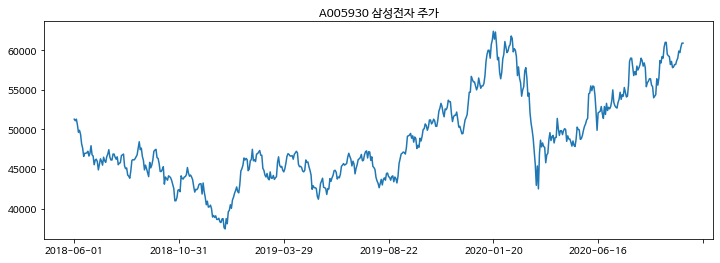

In [30]:
d['adj_close'].loc[code, :].plot(figsize=(12,4), title=f'{code} {codename} 주가');

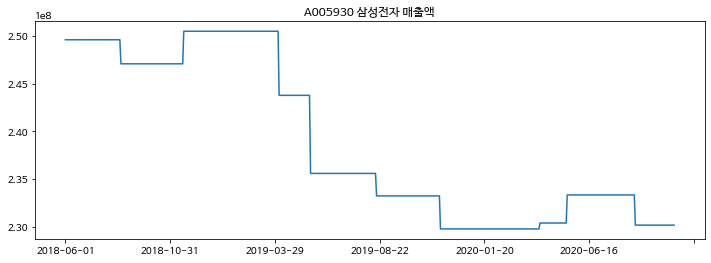

In [31]:
d['sales'].loc[code, :].plot(figsize=(12,4), title=f'{code} {codename} 매출액');

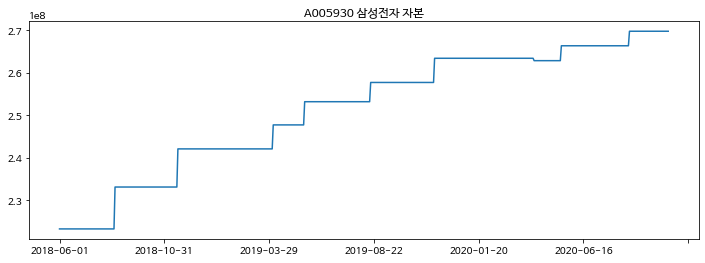

In [32]:
d['eq'].loc[code, :].plot(figsize=(12,4), title=f'{code} {codename} 자본');

#### 주식 데이터 분석1. 전체 주식시장에서 산업 별로 차지하는 비중 계산해보기

In [33]:
# 분석을 수행할 날짜 지정
view_date = '2020-10-14'

In [34]:
# concat할 데이터 살펴보기 (시가총액)
d['mc'].loc[:,view_date]

Symbol
A000020     666200.0
A000030          NaN
A000040      80100.0
A000050     296100.0
A000060    1540400.0
             ...    
A950160     489600.0
A950170     151700.0
A950180     281200.0
A950190     366100.0
A950200     267800.0
Name: 2020-10-14, Length: 2278, dtype: float64

In [35]:
# concat할 데이터 살펴보기 (업종)
stock_info.loc[:,'Sector']

Symbol
A000020       제약_및_바이오
A000030            NaN
A000040       자동차_및_부품
A000050    내구_소비재_및_의류
A000060             보험
              ...     
A950160            NaN
A950170            NaN
A950180            NaN
A950190            NaN
A950200            NaN
Name: Sector, Length: 2278, dtype: object

In [36]:
# 업종과 날짜에 해당하는 시가총액을 병합, 분석의 목표에 부합하는 df를 생성
name_sector_mc_df = pd.concat([stock_info, d['mc'].loc[:,view_date]], axis=1)
name_sector_mc_df

,itemname,Sector,2020-10-14
Symbol,,,
A000020,동화약품,제약_및_바이오,666200.0
A000030,우리은행,NaN,NaN
A000040,KR모터스,자동차_및_부품,80100.0
A000050,경방,내구_소비재_및_의류,296100.0
A000060,메리츠화재,보험,1540400.0
...,...,...,...
A950160,코오롱티슈진,NaN,489600.0
A950170,JTC,NaN,151700.0
A950180,SNK,NaN,281200.0


- 업종별 시가총액 구하기

In [37]:
# groupby sum을 통해, 업종 별로 시가총액 합하기
sector_mc_df = name_sector_mc_df.groupby('Sector').sum().sort_values(view_date)
sector_mc_df

,2020-10-14
Sector,
부동산,2209400.0
기타금융,6915000.0
상업서비스,15234000.0
소비자_서비스,15616600.0
유틸리티,19979400.0
디스플레이,21326800.0
미디어,23265200.0
증권,25332400.0
의료장비_및_서비스,28436300.0


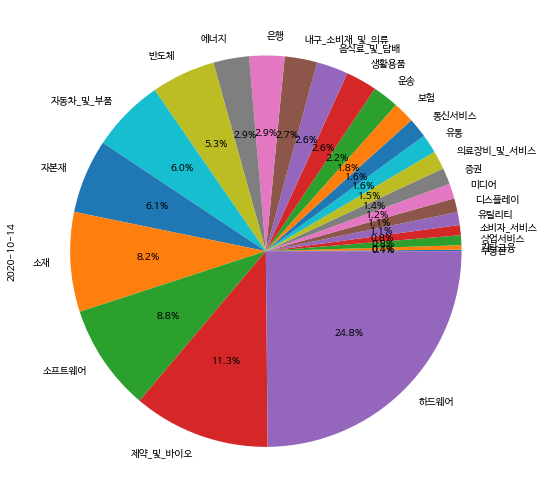

In [38]:
# 업종별로 합산된 시가총액, Pie Chart 그려보기
sector_mc_df.plot(kind='pie', y=view_date, figsize=(15,9), legend=False, autopct='%1.1f%%');

In [39]:
# .query()를 이용하여 해당 섹터에 어떤 종목이 있는지 구경하기
#216개의 기업이 속해있음 산성전자 포함.
name_sector_mc_df.query('Sector == "하드웨어"')

,itemname,Sector,2020-10-14
Symbol,,,
A000670,영풍,하드웨어,880500.0
A004270,남성,하드웨어,141800.0
A004710,한솔테크닉스,하드웨어,302500.0
A004770,써니전자,하드웨어,165900.0
A005070,코스모신소재,하드웨어,425600.0
...,...,...,...
A332570,와이팜,하드웨어,570100.0
A336260,두산퓨얼셀,하드웨어,2577700.0
A336370,두산솔루스,하드웨어,1134900.0


In [41]:
name_sector_mc_df.query('itemname == "삼성전자"')

,itemname,Sector,2020-10-14
Symbol,,,
A005930,삼성전자,하드웨어,363559800.0


#### 주식 데이터 분석2. 최근 수익률이 좋았던 종목은? 수익률이 좋았던 산업은?
* `.pct_change()` 함수로 주가의 변동률을 구할 수 있습니다. (단위가 %가 아닌 비율임을 유의)
* `.pct_change()` 함수의 인자로는 간격을 지정하는 `periods=`, 연산 축을 지정하는 `axis=` 등이 있습니다.

In [40]:
# 데이터 확인하기
d['adj_close'].head()

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,11450.0,...,22100.0,22000.0,21850.0,24100.0,23750.0,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,16350.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,3017.0,...,771.0,743.0,767.0,829.0,810.0,860.0,863.0,863.0,850.0,874.0
A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,14550.0,...,10750.0,10500.0,10550.0,10850.0,10900.0,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,20900.0,...,12750.0,12750.0,12850.0,13150.0,13300.0,13350.0,13900.0,13950.0,13700.0,13550.0


In [42]:
# 1일간의 주가 변동률
d['adj_close'].pct_change(periods=1, axis=1)

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,0.017316,-0.004255,-0.004274,-0.012876,0.000000,0.013043,0.030043,-0.016667,-0.029661,...,0.047393,-0.004525,-0.006818,0.102975,-0.014523,-0.010526,0.027660,-0.006211,0.012500,-0.018519
A000030,NaN,0.029032,0.006270,0.028037,0.006061,0.003012,0.012012,-0.020772,-0.024242,0.015528,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,0.009693,0.001324,0.014545,-0.007820,-0.020033,-0.002681,0.019153,0.000000,-0.005275,...,-0.007722,-0.036316,0.032301,0.080834,-0.022919,0.061728,0.003488,0.000000,-0.015064,0.028235
A000050,NaN,0.026515,0.003690,0.014706,0.000000,0.000000,-0.010870,0.014652,0.046931,0.003448,...,-0.073276,-0.023256,0.004762,0.028436,0.004608,0.000000,0.009174,0.000000,-0.013636,-0.004608
A000060,NaN,0.000000,0.004988,-0.004963,0.017456,-0.012255,0.027295,0.012077,-0.038186,0.037221,...,0.000000,0.000000,0.007843,0.023346,0.011407,0.003759,0.041199,0.003597,-0.017921,-0.010949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,-0.056995,-0.001374,0.064649,0.038760,-0.023632,-0.024204,0.001305,0.016949,-0.035897,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A950170,NaN,0.028881,0.014035,-0.010381,-0.010490,-0.035336,0.029304,-0.032028,-0.003676,-0.121771,...,0.005263,0.020942,0.038462,0.004938,0.029484,-0.007160,0.038462,0.028935,-0.001125,-0.023649
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.004016,0.032258,0.007812,-0.007752,0.003906,0.015564,0.000000,-0.011494,-0.019380,0.055336


In [43]:
# 3일간의 주가 변동률
d['adj_close'].pct_change(periods=3, axis=1)

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,NaN,NaN,0.008658,-0.021277,-0.017094,0.000000,0.043478,0.026087,-0.017167,...,-0.081081,-0.049676,0.035545,0.090498,0.079545,0.075515,0.002075,0.010526,0.034043,-0.012422
A000030,NaN,NaN,NaN,0.064516,0.040752,0.037383,0.021212,-0.006024,-0.033033,-0.029674,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,NaN,NaN,0.025735,0.007944,-0.013554,-0.030303,-0.003941,0.016421,0.013777,...,0.057613,0.045007,-0.012870,0.075227,0.090175,0.121252,0.041013,0.065432,-0.011628,0.012746
A000050,NaN,NaN,NaN,0.045455,0.018450,0.014706,-0.010870,0.003623,0.050725,0.065934,...,0.033654,0.014493,-0.090517,0.009302,0.038095,0.033175,0.013825,0.009174,-0.004587,-0.018182
A000060,NaN,NaN,NaN,0.000000,0.017456,0.000000,0.032419,0.026961,0.000000,0.009662,...,0.003937,-0.015444,0.007843,0.031373,0.043137,0.038911,0.057034,0.048872,0.026217,-0.025180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,0.002591,0.104396,0.079780,-0.010336,-0.046020,-0.006369,-0.018277,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A950170,NaN,NaN,NaN,0.032491,-0.007018,-0.055363,-0.017483,-0.038869,-0.007326,-0.153025,...,-0.011643,0.000000,0.065789,0.065445,0.074359,0.027160,0.061425,0.060859,0.067308,0.003472
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.027451,0.011858,0.036145,0.032258,0.003906,0.011628,0.019531,0.003891,-0.030651,0.022989


##### 여러 투자 기간 (1일, 3일, ... 60일, 120일) 의 수익률을 계산하여, 딕셔너리 d에 할당하기
* `.pct_change()`는 비율을 계산하므로, 백분율 % 로 만들기 위해 100을 곱해줍니다.

In [44]:
for hold_days in [1, 3, 5, 10, 20, 60, 120]:
    table_name = f'return_{hold_days}d'
    d[table_name] = d['adj_close'].pct_change(periods = hold_days, axis=1) * 100
    
    print(f"투자기간 {hold_days} 일, 테이블 {table_name} 연산 완료 !")

투자기간 1 일, 테이블 return_1d 연산 완료 !
투자기간 3 일, 테이블 return_3d 연산 완료 !
투자기간 5 일, 테이블 return_5d 연산 완료 !
투자기간 10 일, 테이블 return_10d 연산 완료 !
투자기간 20 일, 테이블 return_20d 연산 완료 !
투자기간 60 일, 테이블 return_60d 연산 완료 !
투자기간 120 일, 테이블 return_120d 연산 완료 !


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
# 딕셔너리d에 잘 들어갔나 확인하기
d['return_1d']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,1.731602,-0.425532,-0.427350,-1.287554,0.000000,1.304348,3.004292,-1.666667,-2.966102,...,4.739336,-0.452489,-0.681818,10.297483,-1.452282,-1.052632,2.765957,-0.621118,1.250000,-1.851852
A000030,NaN,2.903226,0.626959,2.803738,0.606061,0.301205,1.201201,-2.077151,-2.424242,1.552795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,0.969251,0.132406,1.454545,-0.782014,-2.003284,-0.268097,1.915323,0.000000,-0.527530,...,-0.772201,-3.631647,3.230148,8.083442,-2.291918,6.172840,0.348837,0.000000,-1.506373,2.823529
A000050,NaN,2.651515,0.369004,1.470588,0.000000,0.000000,-1.086957,1.465201,4.693141,0.344828,...,-7.327586,-2.325581,0.476190,2.843602,0.460829,0.000000,0.917431,0.000000,-1.363636,-0.460829
A000060,NaN,0.000000,0.498753,-0.496278,1.745636,-1.225490,2.729529,1.207729,-3.818616,3.722084,...,0.000000,0.000000,0.784314,2.334630,1.140684,0.375940,4.119850,0.359712,-1.792115,-1.094891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,-5.699482,-0.137363,6.464924,3.875969,-2.363184,-2.420382,0.130548,1.694915,-3.589744,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A950170,NaN,2.888087,1.403509,-1.038062,-1.048951,-3.533569,2.930403,-3.202847,-0.367647,-12.177122,...,0.526316,2.094241,3.846154,0.493827,2.948403,-0.715990,3.846154,2.893519,-0.112486,-2.364865
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.401606,3.225806,0.781250,-0.775194,0.390625,1.556420,0.000000,-1.149425,-1.937984,5.533597


In [46]:
# 딕셔너리d에 잘 들어갔나 확인하기
d['return_5d']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,NaN,NaN,NaN,NaN,-0.432900,-0.851064,2.564103,1.287554,-0.434783,...,-11.776447,-12.175649,-9.147609,4.103672,12.559242,6.334842,9.772727,9.839817,0.829876,0.421053
A000030,NaN,NaN,NaN,NaN,NaN,7.419355,5.642633,2.803738,-2.424242,-1.506024,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,NaN,NaN,NaN,NaN,-0.267380,-1.489573,0.264463,-1.173021,-0.919540,...,-3.140704,-4.129032,5.212620,16.596343,4.247104,11.543450,16.150740,12.516297,2.533172,7.901235
A000050,NaN,NaN,NaN,NaN,NaN,4.545455,0.738007,1.838235,5.072464,5.434783,...,0.000000,-2.325581,1.442308,4.830918,-6.034483,1.395349,4.761905,4.265403,0.000000,-0.917431
A000060,NaN,NaN,NaN,NaN,NaN,0.498753,3.241895,3.970223,0.498753,2.450980,...,-3.409091,-2.298851,1.181102,1.544402,4.313725,4.705882,9.019608,8.560311,4.182510,1.879699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,1.683938,5.219780,5.502063,0.775194,-6.467662,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A950170,NaN,NaN,NaN,NaN,NaN,-1.444043,-1.403509,-5.882353,-5.244755,-15.901060,...,-5.795314,-1.515152,4.786546,4.358974,10.263158,8.900524,10.769231,9.753086,9.090909,3.460621
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-7.806691,-2.290076,1.176471,1.185771,3.212851,5.241935,1.953125,0.000000,-1.171875,3.891051


In [49]:
d['return_20d']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.121475,-6.183369,-7.610994,-3.406814,-6.311637,-6.746032,-5.479452,1.479915,-1.018330,-8.092486
A000030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.390671,5.390071,4.353741,-10.184182,-9.395973,-9.473684,-11.938776,-7.403433,14.709852,-0.114286
A000050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.380952,-0.473934,2.427184,2.843602,0.460829,0.000000,-0.900901,-3.083700,-6.060606,-6.086957
A000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.390625,0.000000,1.581028,3.952569,4.313725,5.952381,9.448819,9.842520,8.300395,6.692913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-16.037736,-16.037736,-16.037736,-16.037736,-16.037736,-16.037736,-16.037736,-16.037736,-16.037736,-16.037736
A950170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.413401,1.167315,0.746269,-1.571947,2.570379,3.611457,6.930693,9.753086,4.593640,1.403509
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10.144928,-4.119850,-2.272727,-3.759398,-1.908397,0.772201,-1.136364,-1.901141,-3.435115,1.520913


#### DataFrame을 입력하면, stock_info를 앞에 붙여주는 함수 `get_df_with_info()` 만들기

In [50]:
def get_df_with_info(data_df):
    return pd.concat([stock_info, data_df], axis=1)

In [51]:
d['adj_close'].iloc[:,-5:]

,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,
A000020,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,860.0,863.0,863.0,850.0,874.0
A000050,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,13350.0,13900.0,13950.0,13700.0,13550.0
...,...,...,...,...,...
A950160,8010.0,8010.0,8010.0,8010.0,8010.0
A950170,4160.0,4320.0,4445.0,4440.0,4335.0
A950180,13050.0,13050.0,12900.0,12650.0,13350.0


In [52]:
get_df_with_info(d['adj_close'].iloc[:,-5:])

,itemname,Sector,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,
A000020,동화약품,제약_및_바이오,23500.0,24150.0,24000.0,24300.0,23850.0
A000030,우리은행,NaN,14800.0,14800.0,14800.0,14800.0,14800.0
A000040,KR모터스,자동차_및_부품,860.0,863.0,863.0,850.0,874.0
A000050,경방,내구_소비재_및_의류,10900.0,11000.0,11000.0,10850.0,10800.0
A000060,메리츠화재,보험,13350.0,13900.0,13950.0,13700.0,13550.0
...,...,...,...,...,...,...,...
A950160,코오롱티슈진,NaN,8010.0,8010.0,8010.0,8010.0,8010.0
A950170,JTC,NaN,4160.0,4320.0,4445.0,4440.0,4335.0
A950180,SNK,NaN,13050.0,13050.0,12900.0,12650.0,13350.0


- A042040    247.157191 약 2.4배 오름

In [53]:
# 20일 (달력 기준 1달) 투자기간을 기준으로, 수익률 내림차순 정렬하기
d['return_20d'].loc[:, view_date].sort_values(ascending=False)

Symbol
A042040    247.157191
A123840    203.656598
A033310    155.690440
A118990    131.168831
A214310    118.362283
              ...    
A323990           NaN
A347740           NaN
A347770           NaN
A355150           NaN
A359090           NaN
Name: 2020-10-14, Length: 2278, dtype: float64

In [56]:
# 20일 수익률 기준, 내림차순 종목 및 종목명 함께 보기
sorted_df = get_df_with_info(d['return_20d'].loc[:, view_date]).sort_values(view_date, ascending=False)
sorted_df

,itemname,Sector,2020-10-14
Symbol,,,
A042040,케이피엠테크,소재,247.157191
A123840,한일진공,하드웨어,203.656598
A033310,디케이디앤아이,소재,155.690440
A118990,모트렉스,자동차_및_부품,131.168831
A214310,세미콘라이트,NaN,118.362283
...,...,...,...
A323990,박셀바이오,NaN,NaN
A347740,피엔케이피부임상연구센타,제약_및_바이오,NaN
A347770,핌스,NaN,NaN


In [57]:
sorted_df.iloc[:20,:]

,itemname,Sector,2020-10-14
Symbol,,,
A042040,케이피엠테크,소재,247.157191
A123840,한일진공,하드웨어,203.656598
A033310,디케이디앤아이,소재,155.690440
A118990,모트렉스,자동차_및_부품,131.168831
A214310,세미콘라이트,NaN,118.362283
A033200,모아텍,하드웨어,94.444444
A267320,나인테크,반도체,93.621013
A227950,마이크로텍,반도체,93.202147
A241820,피씨엘,의료장비_및_서비스,90.072639


In [58]:
# 상승률 1등한 종목 고르기
rank1_code = 'A042040'

In [59]:
# 결과가 맞나 직접 계산해보기 (본전을 포함합니다, 3.4715 = 2.4715 + 1)
d['adj_close'].loc[rank1_code].iloc[-1] / d['adj_close'].loc['A042040'].iloc[-21]

3.471571906354515

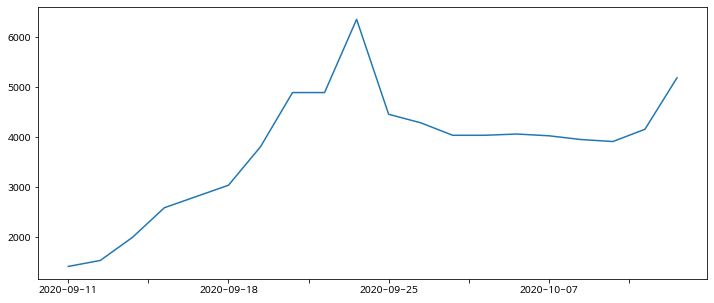

In [60]:
# 상승률 1등 종목, 그래프 그려보기
d['adj_close'].loc[rank1_code].iloc[-20:].plot(figsize=(12,5));

In [61]:
# 업종별로 상승률 정렬해보기
sector_sorted_df = sorted_df.groupby('Sector').mean().sort_values(view_date, ascending=False)
sector_sorted_df

,2020-10-14
Sector,
기타금융,8.223968
자동차_및_부품,7.751347
유틸리티,6.868731
부동산,5.832781
반도체,5.086078
유통,4.659211
디스플레이,4.195345
소재,4.119781
소비자_서비스,3.508325


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


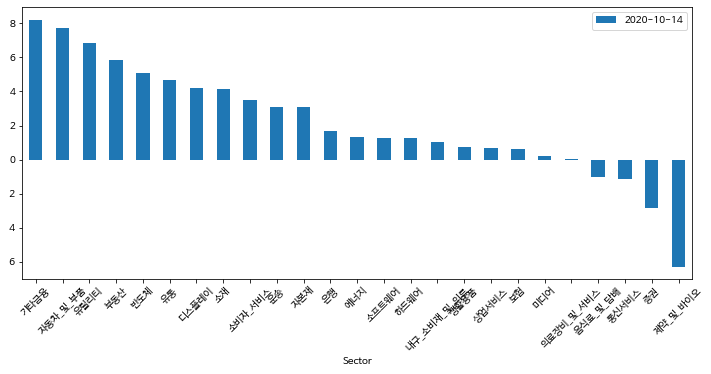

In [63]:
# 업종별 상승률 그래프 그리기
sector_sorted_df.plot(figsize=(12,5), kind='bar');
plt.xticks(rotation=45)

##### 모든 업종 별, 기간 별 수익률 계산하기

In [64]:
sector_1d_df = get_df_with_info(d['return_1d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_3d_df = get_df_with_info(d['return_3d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_5d_df = get_df_with_info(d['return_5d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_10d_df = get_df_with_info(d['return_10d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_20d_df = get_df_with_info(d['return_20d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_60d_df = get_df_with_info(d['return_60d'].loc[:, view_date] * 100).groupby('Sector').mean()
sector_120d_df = get_df_with_info(d['return_120d'].loc[:, view_date] * 100).groupby('Sector').mean()

In [65]:
sector_1d_df

,2020-10-14
Sector,
기타금융,-71.504556
내구_소비재_및_의류,-104.043129
디스플레이,-96.898845
미디어,11.455991
반도체,-60.145947
보험,-84.136988
부동산,-74.104625
상업서비스,-23.417473
생활용품,-112.134850


In [66]:
sector_3d_df

,2020-10-14
Sector,
기타금융,-10.859986
내구_소비재_및_의류,27.129171
디스플레이,-33.844227
미디어,108.534168
반도체,92.048996
보험,-236.689560
부동산,48.508046
상업서비스,151.543565
생활용품,-8.177903


In [67]:
# 그냥 concat할 경우, 컬럼 명이 동일한 날짜이기 때문에, 각각 해당하는 이름으로 변경합니다.
sector_1d_df.columns = ['1일_수익률']
sector_3d_df.columns = ['3일_수익률']
sector_5d_df.columns = ['5일_수익률']
sector_10d_df.columns = ['2주일_수익률']
sector_20d_df.columns = ['1달_수익률']
sector_60d_df.columns = ['3달_수익률']
sector_120d_df.columns = ['6달_수익률']

##### 업종별, 투자 기간별 수익률 그려보기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


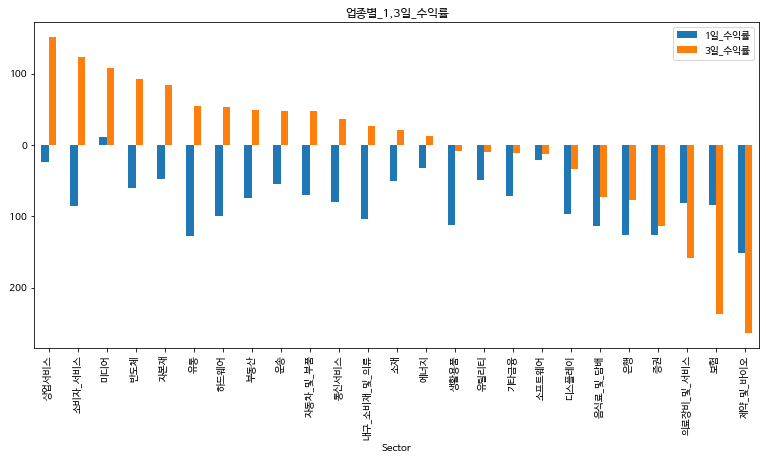

In [68]:
pd.concat([sector_1d_df, sector_3d_df],
          axis=1).sort_values('3일_수익률', ascending=False).plot(figsize=(13,6), kind='bar');
plt.title('업종별_1,3일_수익률');

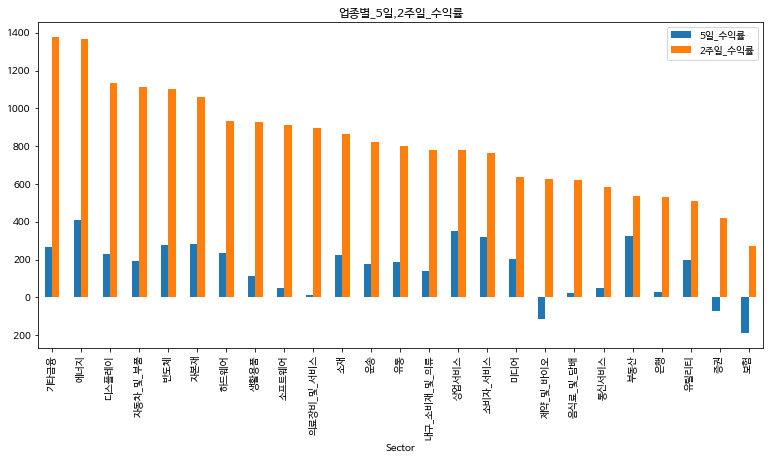

In [69]:
pd.concat([sector_5d_df, sector_10d_df],
          axis=1).sort_values('2주일_수익률', ascending=False).plot(figsize=(13,6), kind='bar');
plt.title('업종별_5일,2주일_수익률');

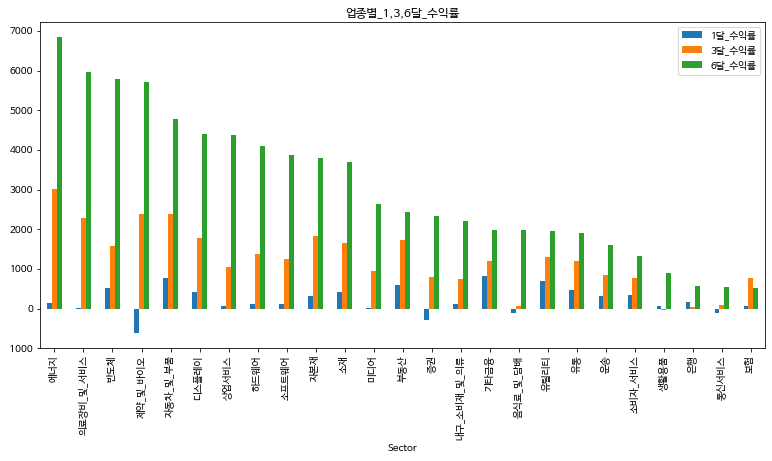

In [70]:
pd.concat([sector_20d_df, sector_60d_df, sector_120d_df],
          axis=1).sort_values('6달_수익률', ascending=False).plot(figsize=(13,6), kind='bar');
plt.title('업종별_1,3,6달_수익률');

##### 모든 종목들에 대한 보유 기간 별, 수익률 구하기
* `.reshape()`를 통해 일자별 수익률을, 한줄로 세웁니다

In [71]:
d['return_1d']

,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,2018-06-18,...,2020-09-25,2020-09-28,2020-09-29,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-12,2020-10-13,2020-10-14
Symbol,,,,,,,,,,,,,,,,,,,,,
A000020,NaN,1.731602,-0.425532,-0.427350,-1.287554,0.000000,1.304348,3.004292,-1.666667,-2.966102,...,4.739336,-0.452489,-0.681818,10.297483,-1.452282,-1.052632,2.765957,-0.621118,1.250000,-1.851852
A000030,NaN,2.903226,0.626959,2.803738,0.606061,0.301205,1.201201,-2.077151,-2.424242,1.552795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A000040,NaN,0.969251,0.132406,1.454545,-0.782014,-2.003284,-0.268097,1.915323,0.000000,-0.527530,...,-0.772201,-3.631647,3.230148,8.083442,-2.291918,6.172840,0.348837,0.000000,-1.506373,2.823529
A000050,NaN,2.651515,0.369004,1.470588,0.000000,0.000000,-1.086957,1.465201,4.693141,0.344828,...,-7.327586,-2.325581,0.476190,2.843602,0.460829,0.000000,0.917431,0.000000,-1.363636,-0.460829
A000060,NaN,0.000000,0.498753,-0.496278,1.745636,-1.225490,2.729529,1.207729,-3.818616,3.722084,...,0.000000,0.000000,0.784314,2.334630,1.140684,0.375940,4.119850,0.359712,-1.792115,-1.094891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A950160,NaN,-5.699482,-0.137363,6.464924,3.875969,-2.363184,-2.420382,0.130548,1.694915,-3.589744,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A950170,NaN,2.888087,1.403509,-1.038062,-1.048951,-3.533569,2.930403,-3.202847,-0.367647,-12.177122,...,0.526316,2.094241,3.846154,0.493827,2.948403,-0.715990,3.846154,2.893519,-0.112486,-2.364865
A950180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.401606,3.225806,0.781250,-0.775194,0.390625,1.556420,0.000000,-1.149425,-1.937984,5.533597


In [72]:
d['return_1d'].values, d['return_1d'].values.shape

(array([[        nan,  1.73160173, -0.42553191, ..., -0.62111801,
          1.25      , -1.85185185],
        [        nan,  2.90322581,  0.62695925, ...,  0.        ,
          0.        ,  0.        ],
        [        nan,  0.96925134,  0.13240649, ...,  0.        ,
         -1.50637312,  2.82352941],
        ...,
        [        nan,         nan,         nan, ..., -1.14942529,
         -1.9379845 ,  5.53359684],
        [        nan,         nan,         nan, ...,  0.87565674,
         -0.17361111, -1.2173913 ],
        [        nan,         nan,         nan, ...,  0.33112583,
         -4.95049505, -1.73611111]]), (2278, 582))

- 한줄로 변환

In [73]:
d['return_1d'].values.reshape(-1), d['return_1d'].values.reshape(-1).shape

(array([        nan,  1.73160173, -0.42553191, ...,  0.33112583,
        -4.95049505, -1.73611111]), (1325796,))

In [74]:
all_return_df = pd.concat([
    pd.Series(d['return_1d'].values.reshape(-1), name='1일_수익률'),
    pd.Series(d['return_3d'].values.reshape(-1), name='3일_수익률'),
    pd.Series(d['return_5d'].values.reshape(-1), name='5일_수익률'),
    pd.Series(d['return_10d'].values.reshape(-1), name='2주_수익률'),
    pd.Series(d['return_20d'].values.reshape(-1), name='1달_수익률'),
    pd.Series(d['return_60d'].values.reshape(-1), name='3달_수익률'),
    pd.Series(d['return_120d'].values.reshape(-1), name='6달_수익률')
], axis=1)

In [75]:
all_return_df

,1일_수익률,3일_수익률,5일_수익률,2주_수익률,1달_수익률,3달_수익률,6달_수익률
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.731602,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.425532,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.427350,0.865801,NaN,NaN,NaN,NaN,NaN
4,-1.287554,-2.127660,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1325791,0.699301,1.408451,2.857143,-1.030928,-14.792899,NaN,NaN
1325792,4.861111,7.473310,8.633094,4.137931,-9.850746,NaN,NaN
1325793,0.331126,5.944056,6.690141,-3.809524,-10.619469,NaN,NaN
1325794,-4.950495,0.000000,2.491103,-3.030303,-16.521739,NaN,NaN


In [76]:
all_return_df.describe().round(3)

,1일_수익률,3일_수익률,5일_수익률,2주_수익률,1달_수익률,3달_수익률,6달_수익률
count,1251890.000,1247334.000,1242778.000,1231388.000,1208664.000,1118322.000,984030.000
mean,0.029,0.103,0.180,0.343,0.755,1.761,2.382
std,3.597,6.530,8.628,12.343,17.696,30.532,45.450
min,-93.289,-96.084,-98.695,-98.695,-98.695,-98.695,-98.695
25%,-1.379,-2.609,-3.461,-5.199,-7.560,-13.800,-19.067
50%,0.000,0.000,0.000,-0.125,-0.279,-1.773,-4.691
75%,1.182,2.299,3.025,4.359,6.407,10.260,11.315
max,190.805,190.805,334.498,379.995,1226.667,1114.896,2033.132


- 장기투자일수록 수익률 높음

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


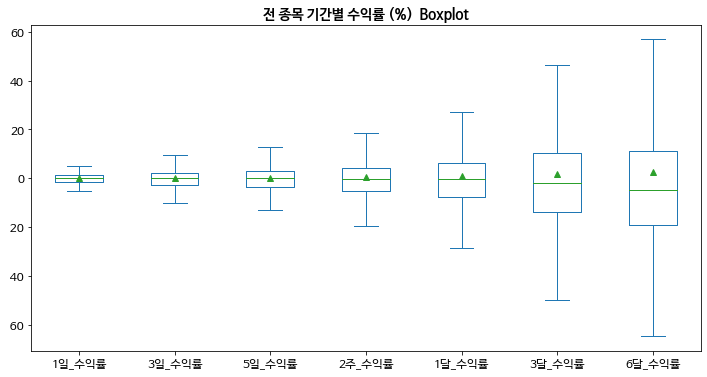

In [77]:
all_return_df.plot(kind='box', figsize=(12,6), showfliers=False, showmeans=True, fontsize=12);
plt.title('전 종목 기간별 수익률 (%)  Boxplot', fontsize=14, fontweight='bold');

## 가설과 실험 수행하기

In [78]:
# 전체 날짜 리스트 만들어두기
date_list = d['adj_close'].columns
date_list

Index(['2018-06-01', '2018-06-04', '2018-06-05', '2018-06-07', '2018-06-08',
       '2018-06-11', '2018-06-12', '2018-06-14', '2018-06-15', '2018-06-18',
       ...
       '2020-09-25', '2020-09-28', '2020-09-29', '2020-10-05', '2020-10-06',
       '2020-10-07', '2020-10-08', '2020-10-12', '2020-10-13', '2020-10-14'],
      dtype='object', length=582)

#### 주식 데이터 분석3. 데이터를 가공해서 종목을 선별해보자 (적자 종목 제거, 하락추세 종목 제거, 종목별 PER 산출, 종목별 거래대금 분석 등)

### 백테스팅

In [79]:
# 20일간의 투자 수익률을 계산할 예정이므로, 뒤에서 20번째 날짜를 골라야 합니다.
date_list[-21]

'2020-09-10'

In [80]:
# 매수할 날짜 지정하기
buy_date = '2020-09-10'

In [82]:
# 데이터에 제공되지 않은 지표, PER과 PBR 계산하여 딕셔너리에 저장하기 (고평가 지표)
d['per'] = d['mc'] / d['ni'] #시가총액/순이익
d['pbr'] = d['mc'] / d['eq']#시가총액/자본

In [83]:
# 매수 날짜에 해당하는 데이터 Series로 추출하기 
series_list = []
for table_name in ['adj_close', 'mc', 'sales', 'op', 'ni', 'return_20d', 'per', 'pbr']:
    sr = pd.Series(d[table_name].loc[:,buy_date])
    sr.name = table_name
    series_list.append(sr)

In [84]:
# 추출한 Series들로 매수 날짜의 데이터 dataframe 만들기
date_data = pd.concat(series_list, axis=1)
date_data

,adj_close,mc,sales,op,ni,return_20d,per,pbr
Symbol,,,,,,,,
A000020,25950.0,724822.0,2.943950e+05,1.742382e+04,1.716170e+04,4.008016,42.234856,2.329205
A000030,14800.0,NaN,9.293464e+06,2.928355e+06,2.058499e+06,0.000000,NaN,NaN
A000040,875.0,80203.0,1.304825e+05,NaN,NaN,21.696801,NaN,1.348501
A000050,11500.0,315276.0,3.328343e+05,2.164980e+04,4.046476e+04,-3.361345,7.791372,0.427833
A000060,12700.0,1443736.0,8.399882e+06,4.269107e+05,3.524787e+05,-5.576208,4.095952,0.555252
...,...,...,...,...,...,...,...,...
A950160,9540.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
A950170,4275.0,149649.0,NaN,NaN,NaN,1.543943,NaN,NaN
A950180,13150.0,276963.0,NaN,NaN,NaN,3.952569,NaN,NaN


- 필터링 .query()활용->123개 선정 후 투자할예정

In [85]:
# 필터링으로 우량한 조건을 걸어, 종목 선별하기
# ni > 0 : 순이익 흑자
# return_20d > 1.0 : 이전 20일 기준 수익률 1%이상
# per < 10 : per 10이하
# pbr < 10 : pbr 10이하
date_data.query("ni > 0 and return_20d > 1.0 and per < 10 and pbr < 10")

,adj_close,mc,sales,op,ni,return_20d,per,pbr
Symbol,,,,,,,,
A000300,832.0,95338.0,4.481113e+05,2.570629e+04,14042.78118,37.520661,6.789111,0.798728
A000540,2420.0,155467.0,3.054332e+06,2.131500e+04,23095.00000,6.140351,6.731630,0.209491
A000860,16050.0,104325.0,3.257437e+05,NaN,16097.00228,3.215434,6.481020,0.183884
A000880,30150.0,2260006.0,5.117369e+07,1.300341e+06,400413.00000,15.296367,5.644187,0.119035
A001270,20250.0,209990.0,1.287451e+05,4.939230e+04,37090.46295,1.250000,5.661563,0.411994
...,...,...,...,...,...,...,...,...
A210980,48200.0,915326.0,6.041581e+05,1.388955e+05,95107.09505,36.350778,9.624161,1.765420
A213500,14500.0,345108.0,1.872914e+06,1.369127e+05,74422.64721,2.473498,4.637137,0.544297
A214180,15750.0,194709.0,1.410492e+05,2.532323e+04,23848.18839,17.537313,8.164520,0.911115


In [86]:
# 선별된 종목의 인덱스 뽑아내기
buy_stock_index = date_data.query("ni > 0 and return_20d > 1.0  and  per < 10  and  pbr < 10").index
buy_stock_index

Index(['A000300', 'A000540', 'A000860', 'A000880', 'A001270', 'A001460',
       'A001530', 'A001940', 'A002020', 'A002030',
       ...
       'A142210', 'A147830', 'A155660', 'A187870', 'A192400', 'A210980',
       'A213500', 'A214180', 'A236200', 'A241520'],
      dtype='object', name='Symbol', length=123)

#### 시뮬레이션1. 분석을 통해 선별한 종목에 투자하면 수익률이 어떨까?

In [87]:
# 전 종목의 평균 수익률
d['return_20d'].loc[:, '2020-10-14'].mean()

1.8118556177803595

In [88]:
# 선별한 종목의 평균 수익률
d['return_20d'].loc[buy_stock_index, '2020-10-14'].mean()

2.845060175723243

#### 시뮬레이션2. 섹터기반해서 종목을 선정하고 수익률을 분석해보자

In [89]:
sector_20d_df = get_df_with_info(d['return_20d'].loc[:, buy_date]).groupby('Sector').mean()
sector_20d_df

,2020-09-10
Sector,
기타금융,0.670927
내구_소비재_및_의류,1.171120
디스플레이,8.065760
미디어,6.378419
반도체,4.150445
보험,-1.424003
부동산,4.327266
상업서비스,1.575905
생활용품,-6.330151


In [90]:
sector_20d_df.sort_values(buy_date, ascending=False)

,2020-09-10
Sector,
에너지,17.227705
제약_및_바이오,11.983591
의료장비_및_서비스,11.530517
소프트웨어,9.447684
디스플레이,8.065760
자동차_및_부품,7.565889
자본재,7.324673
미디어,6.378419
하드웨어,5.062080


In [91]:
date_data

,adj_close,mc,sales,op,ni,return_20d,per,pbr
Symbol,,,,,,,,
A000020,25950.0,724822.0,2.943950e+05,1.742382e+04,1.716170e+04,4.008016,42.234856,2.329205
A000030,14800.0,NaN,9.293464e+06,2.928355e+06,2.058499e+06,0.000000,NaN,NaN
A000040,875.0,80203.0,1.304825e+05,NaN,NaN,21.696801,NaN,1.348501
A000050,11500.0,315276.0,3.328343e+05,2.164980e+04,4.046476e+04,-3.361345,7.791372,0.427833
A000060,12700.0,1443736.0,8.399882e+06,4.269107e+05,3.524787e+05,-5.576208,4.095952,0.555252
...,...,...,...,...,...,...,...,...
A950160,9540.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
A950170,4275.0,149649.0,NaN,NaN,NaN,1.543943,NaN,NaN
A950180,13150.0,276963.0,NaN,NaN,NaN,3.952569,NaN,NaN


In [92]:
date_data_with_sector = get_df_with_info(date_data)
date_data_with_sector

,itemname,Sector,adj_close,mc,sales,op,ni,return_20d,per,pbr
Symbol,,,,,,,,,,
A000020,동화약품,제약_및_바이오,25950.0,724822.0,2.943950e+05,1.742382e+04,1.716170e+04,4.008016,42.234856,2.329205
A000030,우리은행,NaN,14800.0,NaN,9.293464e+06,2.928355e+06,2.058499e+06,0.000000,NaN,NaN
A000040,KR모터스,자동차_및_부품,875.0,80203.0,1.304825e+05,NaN,NaN,21.696801,NaN,1.348501
A000050,경방,내구_소비재_및_의류,11500.0,315276.0,3.328343e+05,2.164980e+04,4.046476e+04,-3.361345,7.791372,0.427833
A000060,메리츠화재,보험,12700.0,1443736.0,8.399882e+06,4.269107e+05,3.524787e+05,-5.576208,4.095952,0.555252
...,...,...,...,...,...,...,...,...,...,...
A950160,코오롱티슈진,NaN,9540.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
A950170,JTC,NaN,4275.0,149649.0,NaN,NaN,NaN,1.543943,NaN,NaN
A950180,SNK,NaN,13150.0,276963.0,NaN,NaN,NaN,3.952569,NaN,NaN


- 필터링 .query()

In [93]:
# 필터링 조건
# 1. 이전 20일 기준 수익률이 가장 높은 섹터 
# 2. pbr < 10 
# 3. ni > 0
print(date_data_with_sector.query("Sector == '에너지' and pbr < 10 and ni > 0").shape)
date_data_with_sector.query("Sector == '에너지'and pbr < 10 and ni > 0")

(21, 10)


,itemname,Sector,adj_close,mc,sales,op,ni,return_20d,per,pbr
Symbol,,,,,,,,,,
A000440,중앙에너비스,에너지,7760.0,48323.0,4.499353e+04,423.75451,207.90556,-3.960396,232.427646,1.084321
A006120,SK디스커버리,에너지,71100.0,1353591.0,4.726873e+06,242974.13093,393360.49442,-12.546125,3.441095,0.538502
A011930,신성이엔지,에너지,2470.0,460717.0,4.600711e+05,12171.46870,6491.72265,92.217899,70.969914,3.344627
A014530,극동유화,에너지,3140.0,109490.0,7.224117e+05,15716.78550,13478.88097,-0.158983,8.123078,0.639253
A017940,E1,에너지,48600.0,333396.0,4.587405e+06,147355.02931,3276.83220,26.233766,101.743385,0.270828
A018670,SK가스,에너지,101500.0,936870.0,4.633058e+06,257143.61646,343476.15612,9.375000,2.727613,0.518330
A024060,흥구석유,에너지,6010.0,90150.0,1.334262e+05,NaN,7825.81443,-9.895052,11.519568,1.198211
A036490,SK머티리얼즈,에너지,251400.0,2651685.0,8.447516e+05,214849.06835,144873.14455,5.320486,18.303496,4.741574
A038870,에코바이오,에너지,10950.0,127140.0,1.570387e+04,239.93297,6135.36245,20.594714,20.722492,2.001791


In [94]:
# 선별된 종목의 인덱스 뽑아내기
buy_stock_index = date_data_with_sector.query("Sector == '에너지' and pbr < 10 and ni > 0").index
buy_stock_index

Index(['A000440', 'A006120', 'A011930', 'A014530', 'A017940', 'A018670',
       'A024060', 'A036490', 'A038870', 'A043220', 'A052690', 'A083650',
       'A093230', 'A094820', 'A100130', 'A100840', 'A112610', 'A126880',
       'A130660', 'A137950', 'A151860'],
      dtype='object', name='Symbol')

In [95]:
# 전 종목의 평균 수익률
d['return_20d'].loc[:, '2020-10-14'].mean()

1.8118556177803595

In [96]:
# 선별한 종목의 평균 수익률
d['return_20d'].loc[buy_stock_index, '2020-10-14'].mean()

2.5559723600104376